# Лабораторная работа №4 "Распознавание рукописных символов"
### Выполнила студентка группы БВТ2101 Пьянова Анна Олеговна

### Цель работы:
Реализовать классификацию черно-белых изображений рукописных цифр (28x28) по 10
категориям (от 0 до 9).

Набор данных содержит 60,000 изображений для обучения и 10,000 изображений для
тестирования.

### Задачи:
- Ознакомиться с представлением графических данных
- Ознакомиться с простейшим способом передачи графических данных нейронной
сети
- Создать модель
- Настроить параметры обучения
- Написать функцию, позволяющаю загружать изображение пользователя и
классифицировать его


### Выполнение работы

Импорт библиотек

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax
from PIL import Image, ImageEnhance
import numpy as np

Загрузка данных

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


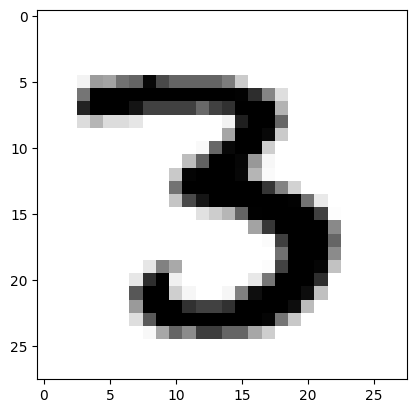

9


In [3]:
plt.imshow(train_images[12],cmap=plt.cm.binary)
plt.show()
print(train_labels[22])

Преобразование к интервалу [0, 1]

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Кодирование меток категорий

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Обчучение различных моделей

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0832
test_acc: 0.9781000018119812


In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0880
test_acc: 0.9771999716758728


In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0799
test_acc: 0.9796000123023987


In [15]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=15, batch_size=128, verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0796
test_acc: 0.9796000123023987


In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9)
model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0957
test_acc: 0.9775000214576721


In [36]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

adamax_optimizer = Adamax(learning_rate=0.001)
model.compile(optimizer=adamax_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=128, verbose=0)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.1000
test_acc: 0.9817000031471252


Функция для загрузки изображения (размер кисточки 66px, белым на черном фоне)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


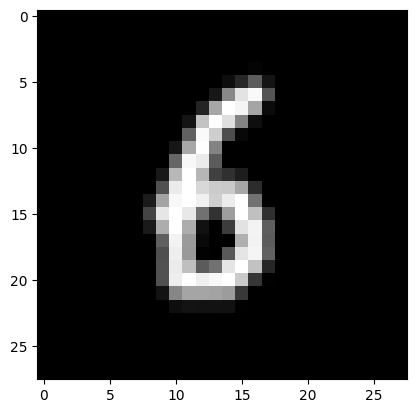

Predicted class: 6


In [57]:
def predict_image(image_path, model):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img = np.array(img) / 255.0

    # Добавляем размерность для канала (axis=2)
    img = np.expand_dims(img, axis=2)

    # Добавляем размерность для батча (axis=0)
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)

    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.show()

    return predicted_class

predicted_class = predict_image('i.png', model)
print(f'Predicted class: {predicted_class}')